In [11]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

base = Path.cwd().parents[1]
print(base)
df = pd.read_csv(base/"Data_clean/caract-2005-2023.csv")

df.head()


/Users/free/Desktop/BDD_LaPoste/bbd_laposte


/var/folders/bh/rf1gy71578l6hm4hg6760kyw0000gn/T/ipykernel_50534/1089382310.py:8: DtypeWarning: Columns (10,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(base/"Data_clean/caract-2005-2023.csv")


,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,Accident_Id,date,weekday
0,2.005000e+11,2005,1,12,19:00,3,2,1,1.0,3.0,11,CD41B,M,50.515,2.944,590,NaN,2005-01-12,3
1,2.005000e+11,2005,1,21,16:00,1,2,1,1.0,1.0,51,rue de Lille,M,50.537,2.802,590,NaN,2005-01-21,5
2,2.005000e+11,2005,1,21,18:45,3,1,1,2.0,1.0,51,NaN,M,50.546,2.800,590,NaN,2005-01-21,5
3,2.005000e+11,2005,1,4,16:15,1,1,1,1.0,5.0,82,NaN,M,50.987,2.408,590,NaN,2005-01-04,2
4,2.005000e+11,2005,1,10,19:45,3,1,1,3.0,6.0,478,NaN,M,50.964,2.475,590,NaN,2005-01-10,1


Gravité des accidents selon la catégorie d'usager

In [12]:
# Charger les données
df = pd.read_csv(base/"Data_clean/usagers-2005-2023.csv")  # ajuste le séparateur si besoin

# Remplacer les codes par des libellés plus lisibles
catu_labels = {1: "Conducteur", 2: "Passager", 3: "Piéton"}
grav_labels = {1: "Indemne", 2: "Tué", 3: "Blessé hospitalisé", 4: "Blessé léger"}

df["catu"] = df["catu"].map(catu_labels)
df["grav"] = df["grav"].map(grav_labels)

/var/folders/bh/rf1gy71578l6hm4hg6760kyw0000gn/T/ipykernel_50534/397331176.py:2: DtypeWarning: Columns (9,13,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(base/"Data_clean/usagers-2005-2023.csv")  # ajuste le séparateur si besoin


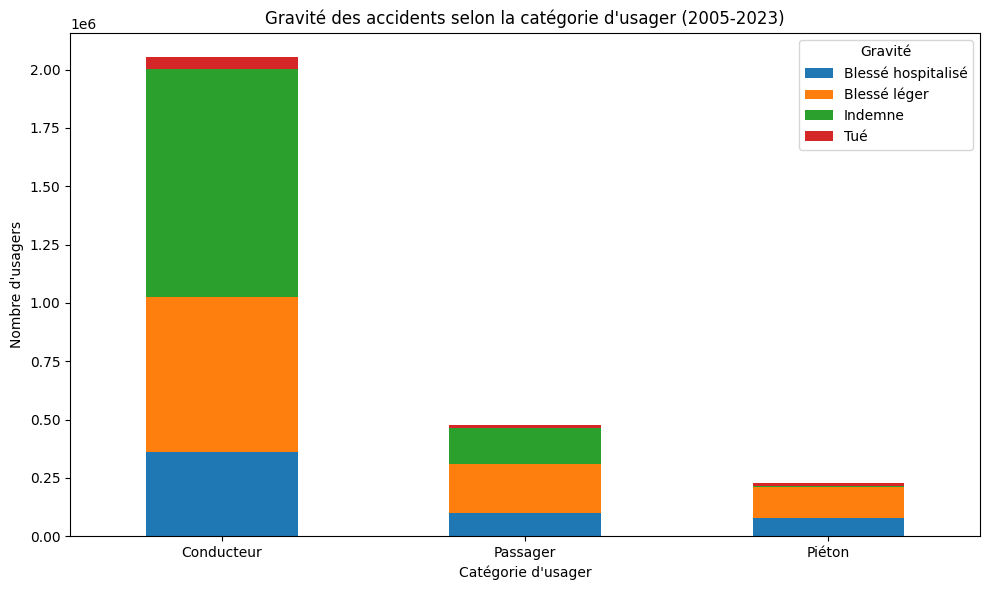

In [13]:
# Créer un tableau croisé pour compter les usagers par catégorie et gravité
pivot = pd.crosstab(df["catu"], df["grav"])

# Tracer un histogramme empilé
pivot.plot(kind="bar", stacked=True, figsize=(10,6))

plt.title("Gravité des accidents selon la catégorie d'usager (2005-2023)")
plt.xlabel("Catégorie d'usager")
plt.ylabel("Nombre d'usagers")
plt.legend(title="Gravité")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Motif du déplacement au moment de l'accident

In [14]:
# Mapper les codes vers des libellés lisibles
trajet_labels = {
    -1: "Non renseigné",
    0: "Non renseigné",
    1: "Domicile - travail",
    2: "Domicile - école",
    3: "Courses - achats",
    4: "Utilisation professionnelle",
    5: "Promenade - loisirs",
    9: "Autre"
}
df["trajet"] = df["trajet"].map(trajet_labels)

# Compter les occurrences de chaque motif
trajet_counts = df["trajet"].value_counts()

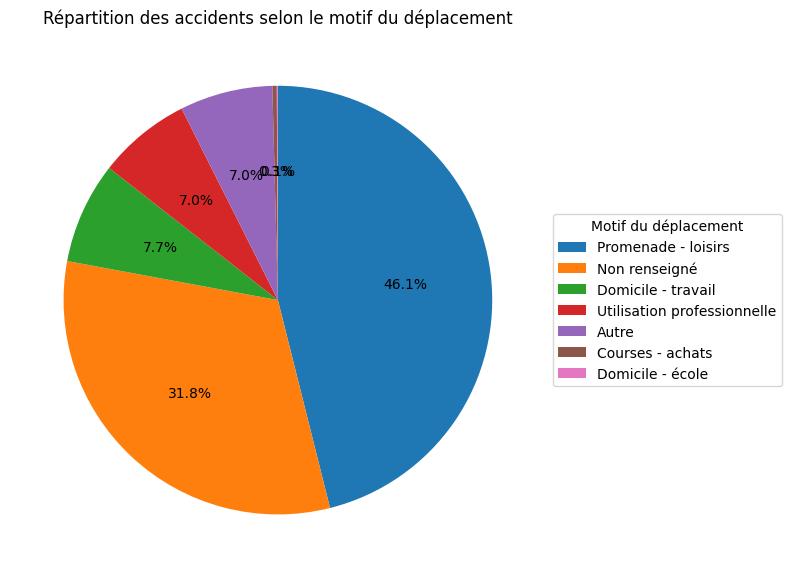

In [24]:
# Tracer un diagramme circulaire
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    trajet_counts,
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False
)

# Ajouter la légende à droite
plt.legend(
    wedges,
    trajet_counts.index,
    title="Motif du déplacement",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title("Répartition des accidents selon le motif du déplacement")
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

base = Path.cwd().parents[1]
print(base)
df = pd.read_csv(base/"Data_clean/full_night_21h_06h.csv")

df.head()


/Users/free/Desktop/BDD_LaPoste/bbd_laposte


/var/folders/bh/rf1gy71578l6hm4hg6760kyw0000gn/T/ipykernel_50534/1446525582.py:8: DtypeWarning: Columns (10,12,15,21,25,26,27,31,32,46,55,59,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(base/"Data_clean/full_night_21h_06h.csv")


,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,locp,actp,etatp,an_nais,num_veh_y,id_vehicule_y,secu1,secu2,secu3,id_usager
0,200500000008,2005,1,18,21:15,5,2,1,2.0,6.0,...,0,0,0,1978,A01,NaN,0,0,0,NaN
1,200500000011,2005,1,23,02:30,3,1,1,1.0,3.0,...,0,0,0,1972,A01,NaN,0,0,0,NaN
2,200500000011,2005,1,23,02:30,3,1,1,1.0,3.0,...,0,0,0,1974,B02,NaN,0,0,0,NaN
3,200500000011,2005,1,23,02:30,3,1,1,1.0,3.0,...,0,0,0,1986,B02,NaN,0,0,0,NaN
4,200500000011,2005,1,23,02:30,3,1,1,1.0,3.0,...,0,0,0,1984,B02,NaN,0,0,0,NaN


# Motif du déplacement au moment de l'accident de 21h à 6h

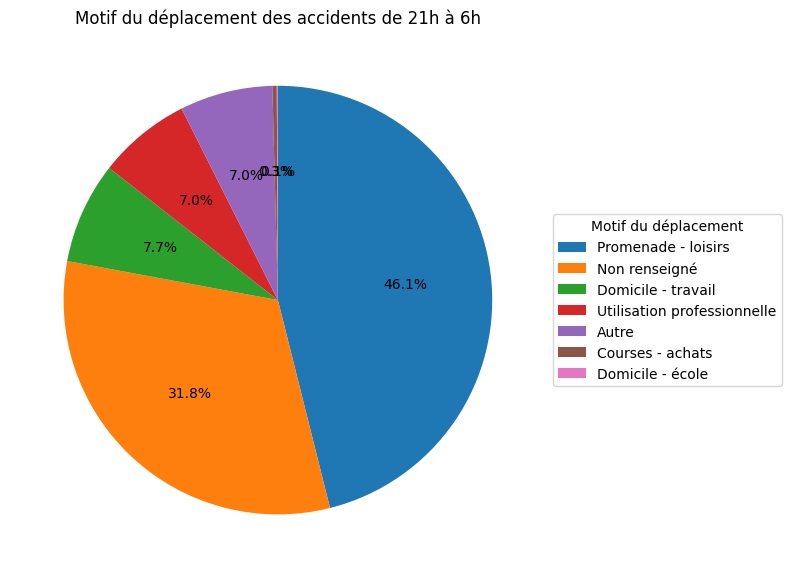

In [17]:
# Mapper les codes vers des libellés lisibles
trajet_labels = {
    -1: "Non renseigné",
    0: "Non renseigné",
    1: "Domicile - travail",
    2: "Domicile - école",
    3: "Courses - achats",
    4: "Utilisation professionnelle",
    5: "Promenade - loisirs",
    9: "Autre"
}
df["trajet"] = df["trajet"].map(trajet_labels)

# Compter les occurrences de chaque motif
trajet_counts = df["trajet"].value_counts()

# Tracer un diagramme circulaire
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    trajet_counts,
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False
)

# Ajouter la légende à droite
plt.legend(
    wedges,
    trajet_counts.index,
    title="Motif du déplacement",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title("Motif du déplacement des accidents de 21h à 6h")
plt.tight_layout()
plt.show()

In [20]:
usagers

,",Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh,id_vehicule,secu1,secu2,secu3,id_usager"
0,"0,200500000001,1,1,4,1,1,11,0,0,0,1976,A01,,0,..."
1,"1,200500000001,1,1,3,2,3,11,0,0,0,1968,B02,,0,..."
2,"2,200500000001,2,2,1,1,0,11,0,0,0,1964,B02,,0,..."
3,"3,200500000001,4,2,1,1,0,31,0,0,0,2004,B02,,0,..."
4,"4,200500000001,5,2,1,1,0,11,0,0,0,1998,B02,,0,..."
...,...
2762161,"125784,202300054821,1,1,4,1,1,0,0,0,-1,1971,A0..."
2762162,"125785,202300054821,1,1,1,2,1,0,0,0,-1,1968,B0..."
2762163,"125786,202300054822,2,2,1,2,2,0,-1, -1,-1,2003..."
2762164,"125787,202300054822,1,1,1,2,1,0,-1, -1,-1,2002..."


# Nombre d'accidents en fonction du nombre de passagers

/var/folders/bh/rf1gy71578l6hm4hg6760kyw0000gn/T/ipykernel_50534/616833334.py:2: DtypeWarning: Columns (9,13,17) have mixed types. Specify dtype option on import or set low_memory=False.
  usagers = pd.read_csv(base/"Data_clean/usagers-2005-2023.csv")


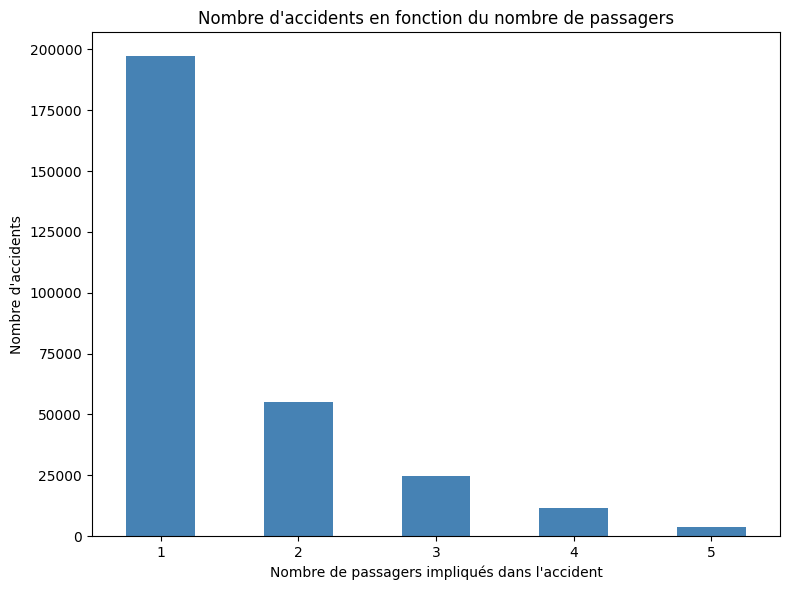

In [25]:
# Charger le fichier usagers
usagers = pd.read_csv(base/"Data_clean/usagers-2005-2023.csv")

# Filtrer uniquement les passagers
passagers = usagers[usagers["catu"] == 2]

# Compter le nombre de passagers par accident
nb_passagers = passagers.groupby("Num_Acc").size()

# Garder uniquement les accidents avec 1 à 5 passagers
accidents_par_nb_passagers = nb_passagers.value_counts().sort_index()
accidents_par_nb_passagers = accidents_par_nb_passagers.loc[1:5]  # filtre de 1 à 5 passagers

# Tracer le graphique
plt.figure(figsize=(8,6))
accidents_par_nb_passagers.plot(kind="bar", color="steelblue")

plt.title("Nombre d'accidents en fonction du nombre de passagers")
plt.xlabel("Nombre de passagers impliqués dans l'accident")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Nombre d'accidents en fonction du nombre de passagers de 21h à 6h

/var/folders/bh/rf1gy71578l6hm4hg6760kyw0000gn/T/ipykernel_50534/3445707695.py:2: DtypeWarning: Columns (10,12,15,21,25,26,27,31,32,46,55,59,63) have mixed types. Specify dtype option on import or set low_memory=False.
  usagers = pd.read_csv(base/"Data_clean/full_night_21h_06h.csv")


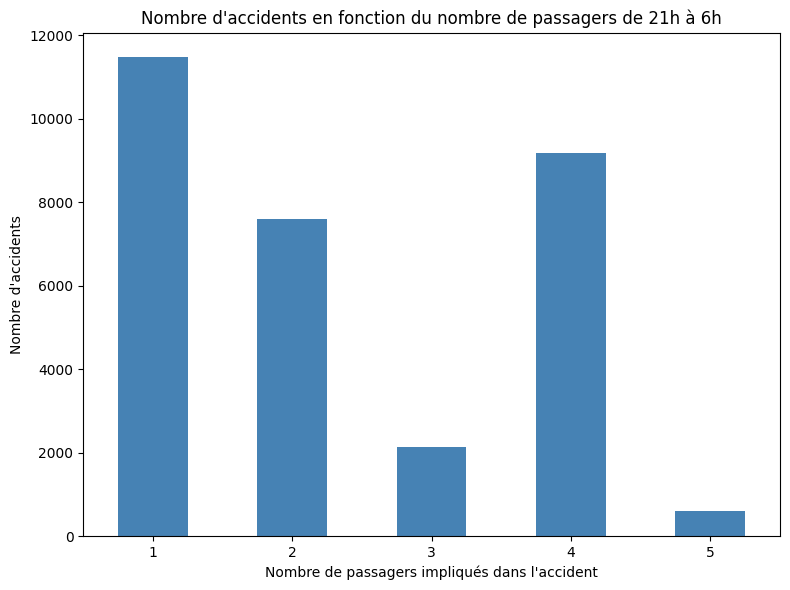

In [28]:
# Charger le fichier usagers
usagers = pd.read_csv(base/"Data_clean/full_night_21h_06h.csv")

# Filtrer uniquement les passagers
passagers = usagers[usagers["catu"] == 2]
passagers = usagers[usagers["night"] == 6]

# Compter le nombre de passagers par accident
nb_passagers = passagers.groupby("Num_Acc").size()

# Garder uniquement les accidents avec 1 à 5 passagers
accidents_par_nb_passagers = nb_passagers.value_counts().sort_index()
accidents_par_nb_passagers = accidents_par_nb_passagers.loc[1:5]  # filtre de 1 à 5 passagers

# Tracer le graphique
plt.figure(figsize=(8,6))
accidents_par_nb_passagers.plot(kind="bar", color="steelblue")

plt.title("Nombre d'accidents en fonction du nombre de passagers de 21h à 6h")
plt.xlabel("Nombre de passagers impliqués dans l'accident")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
